In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.initializers import HeNormal
from sklearn.metrics import classification_report

In [149]:
data_recepcion = pd.read_csv('recepcion.csv')
X = data_recepcion.iloc[:,:8]
y = data_recepcion.iloc[:,8:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)

In [71]:
list(np.argmin(y_train, axis=1))

[0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 4,
 1,
 2,
 2,
 4,
 1,
 4,
 1,
 2,
 0,
 4,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 2,
 1,
 0,
 1,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 0,
 2,
 4,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 4,
 0,
 4,
 1,
 0,
 4,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 4,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 4,
 2,
 4,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 4,
 1,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 4,
 4,
 4,
 1,
 2,
 2,
 2,
 0,
 1,
 4,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 4,
 4,
 1,
 1,
 1,
 0,


In [94]:
# Extraer etiquetas reales (asumiendo one-hot encoding en y_train)
y_train_labels = np.argmax(y_train, axis=1)
 # Calcular pesos automáticamente
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train_labels),
                                    y=y_train_labels
)
class_weights = dict(enumerate(class_weights))
 # Ver pesos calculados
print("Pesos de clases:", class_weights)

Pesos de clases: {0: 1.0}


In [57]:
list(X)

['O-', 'O+', 'B-', 'B+', 'A-', 'A+', 'AB-', 'AB+']

In [ ]:
model = Sequential([Dense(128, activation='leaky_relu', input_shape=(8,), kernel_regularizer='l1l2',  kernel_initializer='he_normal'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(64, activation='leaky_relu', kernel_regularizer='l1l2',  kernel_initializer='he_normal'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(32, activation='leaky_relu'),
                    Dense(8, activation='sigmoid'),
])

optimizer = AdamW(learning_rate=0.001)

model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision', 'Recall'])

early_stopping = EarlyStopping(monitor='val_accuracy',
            patience=40,
            mode='max',
            restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=1e-6,
)


history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    
                    callbacks=reduce_lr
)

Epoch 1/100


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Precision: 0.9027 - Recall: 0.9476 - accuracy: 0.4793 - loss: 0.1694 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 0.2404 - val_loss: 7.5835e-05 - learning_rate: 0.0010
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.9995 - Recall: 0.9993 - accuracy: 0.3944 - loss: 0.0031 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 0.2404 - val_loss: 6.7976e-06 - learning_rate: 0.0010
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.9998 - Recall: 0.9997 - accuracy: 0.3721 - loss: 0.0010 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 0.2404 - val_loss: 1.4486e-06 - learning_rate: 0.0010
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.9997 - Recall: 0.9998 - accuracy: 0.4001 - loss: 7.8753e-04 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 0.2404 - val_loss: 5.0465e-07 - learning_rate: 0.0010
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [130]:
# Predecir clases
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# Imprimir reporte
print(classification_report(y_true_classes, y_pred_classes))

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     15000
           1       0.00      0.00      0.00         0

    accuracy                           0.75     15000
   macro avg       0.50      0.37      0.43     15000
weighted avg       1.00      0.75      0.86     15000



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [131]:
y_pred = model.predict(X_test)
y_pred

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.5862718e-10, 2.4181621e-10, ..., 2.0081337e-09,
        6.8587713e-10, 4.0276915e-09],
       [1.0000000e+00, 7.9755025e-10, 1.0000000e+00, ..., 6.3404237e-10,
        1.0000000e+00, 5.5102136e-09],
       ...,
       [1.0000000e+00, 1.5862718e-10, 2.4181621e-10, ..., 2.0081337e-09,
        6.8587713e-10, 4.0276915e-09],
       [9.9999994e-01, 1.0000000e+00, 1.0000000e+00, ..., 1.4094480e-09,
        1.4903868e-09, 2.0191809e-08],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [333]:
# Definimos el modelo
modelo_recepcion = Sequential()

modelo_recepcion.add(Dense(128, activation='leaky_relu', input_shape=(8,), kernel_regularizer='l1', kernel_initializer='he_normal'))
modelo_recepcion.add(BatchNormalization())
modelo_recepcion.add(Dropout(.5))
modelo_recepcion.add(Dense(64, activation='leaky_relu', kernel_regularizer='l1', kernel_initializer='he_normal'))
modelo_recepcion.add(BatchNormalization())
modelo_recepcion.add(Dropout(.5))
modelo_recepcion.add(Dense(32, activation='leaky_relu'))
modelo_recepcion.add(Dense(8, activation='sigmoid'))

reduce_lr1 = ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=1e-6,
                
)

# Definimos Optimizador
optimizador = AdamW(learning_rate=0.001)


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [306]:
modelo_recepcion.summary()

Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_317 (Dense)               │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_158         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_158 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_159         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_159 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,794 (143.73 KB)

 Trainable params: 12,136 (47.41 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 24,274 (94.82 KB)

In [334]:
# Compilamos el modelo usando 'binary_crossentropy'
modelo_recepcion.compile(loss=['binary_crossentropy'], optimizer=optimizador, metrics=['accuracy'])

# Entrenamos el modelo
symmary = modelo_recepcion.fit(X_train, y_train,batch_size=32,epochs=100,validation_split=0.2, callbacks=reduce_lr1)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4837 - loss: 4.9889 - val_accuracy: 0.6235 - val_loss: 0.1604 - learning_rate: 0.0010
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4650 - loss: 0.1503 - val_accuracy: 0.5021 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4822 - loss: 0.1532 - val_accuracy: 0.3660 - val_loss: 0.1278 - learning_rate: 0.0010
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5092 - loss: 0.1458 - val_accuracy: 0.4986 - val_loss: 0.1644 - learning_rate: 0.0010
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5373 - loss: 0.1669 - val_accuracy: 0.3728 - val_loss: 0.1509 - learning_rate: 0.0010
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5843 - loss: 0.1421 - val_accuracy: 0.4920 - val_loss: 0.1220 - learning_rate: 0.0010
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6

In [335]:
predictions = modelo_recepcion.predict(X_test)
list(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


[array([0.99999994, 0.99996907, 0.9999794 , 0.9999102 , 0.999981  ,
        0.99991447, 0.9998831 , 0.99981815], dtype=float32),
 array([1.0000000e+00, 6.3962244e-07, 9.2561513e-06, 6.4104860e-11,
        9.9988937e-01, 6.3588523e-06, 4.3854943e-05, 6.4137184e-10],
       dtype=float32),
 array([1.0000000e+00, 3.9977785e-06, 9.9999523e-01, 5.5128671e-06,
        9.9998951e-01, 1.3935488e-05, 9.9988461e-01, 2.7694359e-05],
       dtype=float32),
 array([1.0000000e+00, 9.9998504e-01, 9.9997163e-01, 9.9986929e-01,
        8.7113972e-07, 4.6895902e-06, 3.5777175e-06, 1.9681524e-05],
       dtype=float32),
 array([1.0000000e+00, 9.9998504e-01, 9.9997163e-01, 9.9986929e-01,
        8.7113972e-07, 4.6895902e-06, 3.5777175e-06, 1.9681524e-05],
       dtype=float32),
 array([1.0000000e+00, 4.3793207e-06, 9.9990982e-01, 8.9096338e-06,
        3.7821499e-06, 1.1346691e-11, 1.1602894e-05, 6.0267943e-11],
       dtype=float32),
 array([1.0000000e+00, 9.9998504e-01, 9.9997163e-01, 9.9986929e-01,
   

In [342]:
evaluacion = modelo_recepcion.evaluate(X_test, y_test, verbose=0)[1]
print(f'Test Accuracy: {np.round(evaluacion,3)}')
print(np.round(np.sqrt(np.mean((y_test-predictions)**2)),3))

Test Accuracy: 1.0
0.0


In [254]:
X_train, X_test, y_train, y_test

(       O-  O+  B-  B+  A-  A+  AB-  AB+
 31724   0   0   1   0   0   0    0    0
 9389    0   1   0   0   0   0    0    0
 17228   0   0   0   0   0   0    1    0
 41843   0   0   0   0   0   0    0    1
 31584   0   1   0   0   0   0    0    0
 ...    ..  ..  ..  ..  ..  ..  ...  ...
 21633   0   1   0   0   0   0    0    0
 19857   0   0   0   0   0   0    0    1
 14528   0   0   0   1   0   0    0    0
 899     0   0   0   0   1   0    0    0
 45474   0   0   0   0   0   0    0    1
 
 [40000 rows x 8 columns],
        O-  O+  B-  B+  A-  A+  AB-  AB+
 11022   0   0   0   0   0   0    0    1
 7940    0   0   0   0   1   0    0    0
 30599   0   0   0   0   0   0    1    0
 12942   0   0   0   1   0   0    0    0
 32515   0   0   0   1   0   0    0    0
 ...    ..  ..  ..  ..  ..  ..  ...  ...
 25599   0   0   0   1   0   0    0    0
 5165    0   0   0   0   1   0    0    0
 10231   0   0   0   0   0   1    0    0
 13642   0   0   0   0   1   0    0    0
 535     0   0   0   0   0  

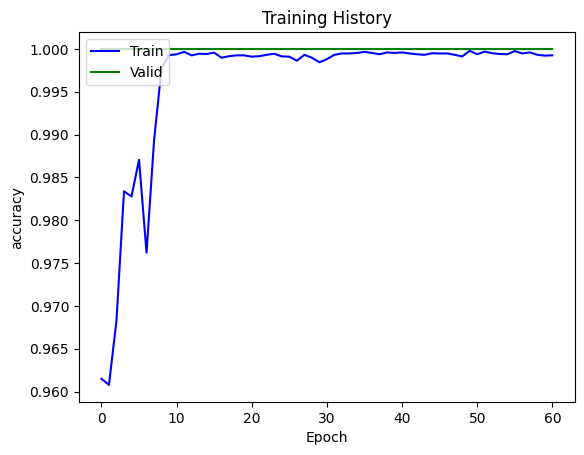

In [ ]:
n_skip = 10
plt.plot(symmary.history['accuracy'][20:81], c='b')
plt.plot(symmary.history['val_accuracy'][20:81], c='g')

plt.legend(['Train','Valid'], loc='upper left')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [339]:
symmary.history['accuracy'][20:41]

[0.9614999890327454,
 0.9607812762260437,
 0.9682812690734863,
 0.9833750128746033,
 0.9827812314033508,
 0.9870625138282776,
 0.9762187600135803,
 0.9893125295639038,
 0.9977812767028809,
 0.9992812275886536,
 0.9993749856948853,
 0.9996562600135803,
 0.9992499947547913,
 0.9994375109672546,
 0.9994062781333923,
 0.9995625019073486,
 0.9989687204360962,
 0.9991562366485596,
 0.9992499947547913,
 0.9992499947547913,
 0.999093770980835]